### Dump resistor analysis for v8

In [1]:
import detection as _detection
import materials as _materials
import quench as _quench

import numpy as _np
import matplotlib.pyplot as _plt

"""
This script estimates the hot-spot temperature for
two operating current scenarios of Model 8: 228 and 300 A.

The impact of increasing the maximum voltage across the
dump resistor is also analysed.
"""

'\nThis script estimates the hot-spot temperature for\ntwo operating current scenarios of Model 8: 228 and 300 A.\n\nThe impact of increasing the maximum voltage across the\ndump resistor is also analysed.\n'

Parameters for MIITS analysis

In [10]:
# Maximum voltage across dump resistor [V]
Vmin = 450
Vop = 600
Vmax = 900
# Magnet Inductance [H]
L = 0.122

I_min = 228
I_max = 300

### Operation parameters for high-field
dict_high_field_parameters = {

    # Operating current [A]
    'Iop' : I_min,

    # Operating field [T]
    'B' : 5.30,

    # Operating SC temperature [K]
    'Top' : 5.0,

    # Critical temperature [K]
    'Tc' : 9.2,

    # Current-sharing temperature [K]
    'Tcs' : 6.1,

    # Residual resistivity ratio
    'RRR' : 131,

    # Cu/Nb-Ti ratio
    'ratio_cu_sc' : 0.92,

    # Total conductor diameter [m]
    'd_cond' : 8.5633e-4,

    'L' : L
}


#### Calculate hot-spot by MIITS method

In [11]:
t_switch_list = [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

hotspot_Imin_Vmin = []
hotspot_Imax_Vmin = []
hotspot_Imin_Vop = []
hotspot_Imax_Vop = []
hotspot_Imin_Vmax = []
hotspot_Imax_Vmax = []

# wire object created only to get areas
wire = _materials.SCWire(dict_high_field_parameters)

R1 = _quench.calc_resistor(I_max, Vop)
tau1 = L/R1
R2 = _quench.calc_resistor(I_max, Vmax)
tau2 = L/R2
R3 = _quench.calc_resistor(I_max, Vmin)
tau3 = L/R3
iter_cnt = 0
for t_switch in t_switch_list:
    iter_cnt += 1
    print('iter={}'.format(iter_cnt))
    hotspot_Imin_Vop.append(
        _quench.calc_hot_spot(
            wire.s_cu,
            wire.s_sc,
            I_min,
            tau1,
            t_switch,
            dict_high_field_parameters['RRR'],
            B=dict_high_field_parameters['B']
        )
    )
    hotspot_Imax_Vop.append(
        _quench.calc_hot_spot(
            wire.s_cu,
            wire.s_sc,
            I_max,
            tau1,
            t_switch,
            dict_high_field_parameters['RRR'],
            B=dict_high_field_parameters['B']
        )
    )
    hotspot_Imin_Vmax.append(
        _quench.calc_hot_spot(
            wire.s_cu,
            wire.s_sc,
            I_min,
            tau2,
            t_switch,
            dict_high_field_parameters['RRR'],
            B=dict_high_field_parameters['B']
        )
    )
    hotspot_Imax_Vmax.append(
        _quench.calc_hot_spot(
            wire.s_cu,
            wire.s_sc,
            I_max,
            tau2,
            t_switch,
            dict_high_field_parameters['RRR'],
            B=dict_high_field_parameters['B']
        )
    )
    hotspot_Imin_Vmin.append(
        _quench.calc_hot_spot(
            wire.s_cu,
            wire.s_sc,
            I_min,
            tau3,
            t_switch,
            dict_high_field_parameters['RRR'],
            B=dict_high_field_parameters['B']
        )
    )
    hotspot_Imax_Vmin.append(
        _quench.calc_hot_spot(
            wire.s_cu,
            wire.s_sc,
            I_max,
            tau3,
            t_switch,
            dict_high_field_parameters['RRR'],
            B=dict_high_field_parameters['B']
        )
    )


iter=1
iter=2
iter=3
iter=4
iter=5
iter=6
iter=7
iter=8
iter=9


Print MIITS analysis results



 *** Protection results ***

 Results for Model 8

    R = 2.0 ohm
    tau = 0.061
    R2 = 3.0 ohm
    tau2 = 0.04066666666666666
    R3 = 1.6 ohm
    tau3 = 0.07625


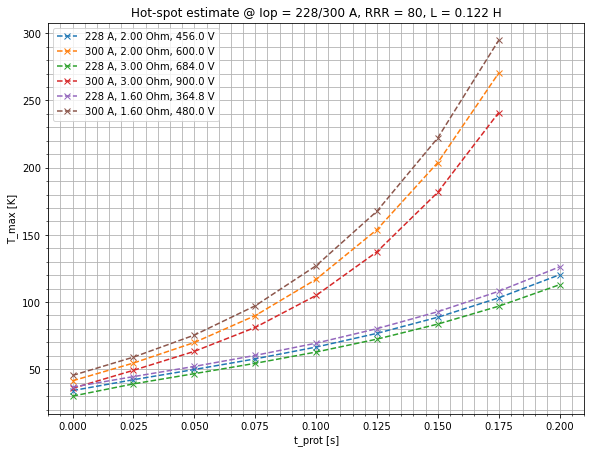

In [12]:
figure_size = [9.6, 7.2]

print('\n\n *** Protection results ***\n')

print(' Results for Model 8\n')
print('    R = {} ohm'.format(R1))
print('    tau = {}'.format(tau1))
print('    R2 = {} ohm'.format(R2))
print('    tau2 = {}'.format(tau2))
print('    R3 = {} ohm'.format(R3))
print('    tau3 = {}'.format(tau3))

_plt.figure(figsize=figure_size)
_plt.plot(t_switch_list, hotspot_Imin_Vop, '--x')
_plt.plot(t_switch_list, hotspot_Imax_Vop, '--x')
_plt.plot(t_switch_list, hotspot_Imin_Vmax, '--x')
_plt.plot(t_switch_list, hotspot_Imax_Vmax, '--x')
_plt.plot(t_switch_list, hotspot_Imin_Vmin, '--x')
_plt.plot(t_switch_list, hotspot_Imax_Vmin, '--x')

_plt.title(
        'Hot-spot estimate @ Iop = {}/{} A, RRR = {}, L = {:.3f} H'.format(
            I_min,
            I_max,
            dict_high_field_parameters['RRR'],
            L)
    )
_plt.legend(
    [
        '{} A, {:.2f} Ohm, {} V'.format(I_min, R1, I_min*R1),
        '{} A, {:.2f} Ohm, {} V'.format(I_max, R1, I_max*R1),
        '{} A, {:.2f} Ohm, {} V'.format(I_min, R2, I_min*R2),
        '{} A, {:.2f} Ohm, {} V'.format(I_max, R2, I_max*R2),
        '{} A, {:.2f} Ohm, {} V'.format(I_min, R3, I_min*R3),
        '{} A, {:.2f} Ohm, {} V'.format(I_max, R3, I_max*R3)
        ]
)

_plt.xlabel('t_prot [s]')
_plt.ylabel('T_max [K]')
_plt.minorticks_on()
_plt.grid(which='both', axis='both')
_plt.show()

#### Calculate hot-spot by Wilson's method

In [13]:
model8_RRR = 131
time_step_1 = 0.00001
time_step_2 = 0.001
t_switch_time_step = 0.005
curr_tol = 1 # A
ps_delay = 0.07 # sec
max_ps_voltage = 10 # V
V_fw_diode = 0 # V
L_I = {
    0.5 : 5.5871,
    1.0 : 2.8398,
    5.0 : 0.6421,
    10.0 : 0.3675,
    22.8 : 0.2137,
    45.6 : 0.1543,
    68.4 : 0.1350,
    91.2 : 0.1258,
    114.0 : 0.1206,
    136.8 : 0.1174,
    159.6 : 0.1153,
    182.4 : 0.1140,
    205.2 : 0.1131,
    228.0 : 0.1126,
    250.0 : 0.1123,
    300.0 : 0.1122,
}

hotspot_Imin_Vop = []
hotspot_Imax_Vop = []
hotspot_Imin_Vmax = []
hotspot_Imax_Vmax = []
hotspot_Imin_Vmin = []
hotspot_Imax_Vmin = []

for t_switch in t_switch_list:
    [
        R, I, Vq, Ve, Vc, Vl, Vnz, Eq, Eps, Tmax, Tavg,
        final_zone_transv_radius, final_zone_long_radius,
        time_axis, iter_cnt
    ] = _quench.simple_quench_propagation(
            I_op=I_min,
            T_cs=dict_high_field_parameters['Tcs'],
            T_op=dict_high_field_parameters['Top'],
            copper_area=wire.s_cu,
            nbti_area=wire.s_sc,
            insulator_area=0,
            inductanceI=L_I,
            magnet_vol=564 * (wire.s_cu + wire.s_sc),
            t_valid=t_switch,
            t_act=0,
            det_tresh=0,
            R_dump=R1,
            time_step_1=time_step_1,
            time_step_2=time_step_2,
            switch_time_step=t_switch_time_step,
            RRR=model8_RRR,
            B=dict_high_field_parameters['B'],
            alpha=0.01,
            tolerance=curr_tol,
            geometry='line',
            V_ps_max = max_ps_voltage,
            t_ps=ps_delay,
            V_fw_diode=V_fw_diode,
            use_magnetoresist=True,
            update_tcs=True,
            print_results=False,
            write_files=False
        )
    hotspot_Imin_Vop.append(Tmax[-1])

    [
        R, I, Vq, Ve, Vc, Vl, Vnz, Eq, Eps, Tmax, Tavg,
        final_zone_transv_radius, final_zone_long_radius,
        time_axis, iter_cnt
    ] = _quench.simple_quench_propagation(
            I_op=I_max,
            T_cs=dict_high_field_parameters['Tcs'],
            T_op=dict_high_field_parameters['Top'],
            copper_area=wire.s_cu,
            nbti_area=wire.s_sc,
            insulator_area=0,
            inductanceI=L_I,
            magnet_vol=564 * (wire.s_cu + wire.s_sc),
            t_valid=t_switch,
            t_act=0,
            det_tresh=0,
            R_dump=R1,
            time_step_1=time_step_1,
            time_step_2=time_step_2,
            switch_time_step=t_switch_time_step,
            RRR=model8_RRR,
            B=dict_high_field_parameters['B'],
            alpha=0.01,
            tolerance=curr_tol,
            geometry='line',
            V_ps_max = max_ps_voltage,
            t_ps=ps_delay,
            V_fw_diode=V_fw_diode,
            use_magnetoresist=True,
            update_tcs=True,
            print_results=False,
            write_files=False
        )
    hotspot_Imax_Vop.append(Tmax[-1])

    [
        R, I, Vq, Ve, Vc, Vl, Vnz, Eq, Eps, Tmax, Tavg,
        final_zone_transv_radius, final_zone_long_radius,
        time_axis, iter_cnt
    ] = _quench.simple_quench_propagation(
            I_op=I_min,
            T_cs=dict_high_field_parameters['Tcs'],
            T_op=dict_high_field_parameters['Top'],
            copper_area=wire.s_cu,
            nbti_area=wire.s_sc,
            insulator_area=0,
            inductanceI=L_I,
            magnet_vol=564 * (wire.s_cu + wire.s_sc),
            t_valid=t_switch,
            t_act=0,
            det_tresh=0,
            R_dump=R2,
            time_step_1=time_step_1,
            time_step_2=time_step_2,
            switch_time_step=t_switch_time_step,
            RRR=model8_RRR,
            B=dict_high_field_parameters['B'],
            alpha=0.01,
            tolerance=curr_tol,
            geometry='line',
            V_ps_max = max_ps_voltage,
            t_ps=ps_delay,
            V_fw_diode=V_fw_diode,
            use_magnetoresist=True,
            update_tcs=True,
            print_results=False,
            write_files=False
        )
    hotspot_Imin_Vmax.append(Tmax[-1])

    [
        R, I, Vq, Ve, Vc, Vl, Vnz, Eq, Eps, Tmax, Tavg,
        final_zone_transv_radius, final_zone_long_radius,
        time_axis, iter_cnt
    ] = _quench.simple_quench_propagation(
            I_op=I_max,
            T_cs=dict_high_field_parameters['Tcs'],
            T_op=dict_high_field_parameters['Top'],
            copper_area=wire.s_cu,
            nbti_area=wire.s_sc,
            insulator_area=0,
            inductanceI=L_I,
            magnet_vol=564 * (wire.s_cu + wire.s_sc),
            t_valid=t_switch,
            t_act=0,
            det_tresh=0,
            R_dump=R2,
            time_step_1=time_step_1,
            time_step_2=time_step_2,
            switch_time_step=t_switch_time_step,
            RRR=model8_RRR,
            B=dict_high_field_parameters['B'],
            alpha=0.01,
            tolerance=curr_tol,
            geometry='line',
            V_ps_max = max_ps_voltage,
            t_ps=ps_delay,
            V_fw_diode=V_fw_diode,
            use_magnetoresist=True,
            update_tcs=True,
            print_results=False,
            write_files=False
        )
    hotspot_Imax_Vmax.append(Tmax[-1])

    [
        R, I, Vq, Ve, Vc, Vl, Vnz, Eq, Eps, Tmax, Tavg,
        final_zone_transv_radius, final_zone_long_radius,
        time_axis, iter_cnt
    ] = _quench.simple_quench_propagation(
            I_op=I_min,
            T_cs=dict_high_field_parameters['Tcs'],
            T_op=dict_high_field_parameters['Top'],
            copper_area=wire.s_cu,
            nbti_area=wire.s_sc,
            insulator_area=0,
            inductanceI=L_I,
            magnet_vol=564 * (wire.s_cu + wire.s_sc),
            t_valid=t_switch,
            t_act=0,
            det_tresh=0,
            R_dump=R3,
            time_step_1=time_step_1,
            time_step_2=time_step_2,
            switch_time_step=t_switch_time_step,
            RRR=model8_RRR,
            B=dict_high_field_parameters['B'],
            alpha=0.01,
            tolerance=curr_tol,
            geometry='line',
            V_ps_max = max_ps_voltage,
            t_ps=ps_delay,
            V_fw_diode=V_fw_diode,
            use_magnetoresist=True,
            update_tcs=True,
            print_results=False,
            write_files=False
        )
    hotspot_Imin_Vmin.append(Tmax[-1])

    [
        R, I, Vq, Ve, Vc, Vl, Vnz, Eq, Eps, Tmax, Tavg,
        final_zone_transv_radius, final_zone_long_radius,
        time_axis, iter_cnt
    ] = _quench.simple_quench_propagation(
            I_op=I_max,
            T_cs=dict_high_field_parameters['Tcs'],
            T_op=dict_high_field_parameters['Top'],
            copper_area=wire.s_cu,
            nbti_area=wire.s_sc,
            insulator_area=0,
            inductanceI=L_I,
            magnet_vol=564 * (wire.s_cu + wire.s_sc),
            t_valid=t_switch,
            t_act=0,
            det_tresh=0,
            R_dump=R3,
            time_step_1=time_step_1,
            time_step_2=time_step_2,
            switch_time_step=t_switch_time_step,
            RRR=model8_RRR,
            B=dict_high_field_parameters['B'],
            alpha=0.01,
            tolerance=curr_tol,
            geometry='line',
            V_ps_max = max_ps_voltage,
            t_ps=ps_delay,
            V_fw_diode=V_fw_diode,
            use_magnetoresist=True,
            update_tcs=True,
            print_results=False,
            write_files=False
        )
    hotspot_Imax_Vmin.append(Tmax[-1])


num iter = 1
max temp = 7.782182280493483
Iop = 227.96039074643954


num iter = 2
max temp = 7.909830883672473
Iop = 227.9207888178727


num iter = 3
max temp = 8.033302591469026
Iop = 227.88119421283704


num iter = 4
max temp = 8.15278488415898
Iop = 227.8416069298705


num iter = 5
max temp = 8.268268518663108
Iop = 227.8020269675113


num iter = 6
max temp = 8.38007363059748
Iop = 227.762454324298


num iter = 7
max temp = 8.48848022445093
Iop = 227.72288899876952


num iter = 8
max temp = 8.593734886739007
Iop = 227.68333098946502


num iter = 9
max temp = 8.69605611823865
Iop = 227.64378029492406


num iter = 10
max temp = 8.795638617961629
Iop = 227.6042369136865


num iter = 11
max temp = 8.89265676064413
Iop = 227.56470084429253


num iter = 12
max temp = 8.987267446178882
Iop = 227.52517208528266


num iter = 13
max temp = 9.079612454500325
Iop = 227.48565063519771


num iter = 14
max temp = 9.169820407093207
Iop = 227.44613649257883


num iter = 15
max temp = 9.2580084126797

KeyboardInterrupt: 

Print Wilson analysis results

In [ ]:
_plt.figure(figsize=figure_size)
_plt.plot(t_switch_list, hotspot_Imin_Vop, '--x')
_plt.plot(t_switch_list, hotspot_Imax_Vop, '--x')
_plt.plot(t_switch_list, hotspot_Imin_Vmax, '--x')
_plt.plot(t_switch_list, hotspot_Imax_Vmax, '--x')
_plt.plot(t_switch_list, hotspot_Imin_Vmin, '--x')
_plt.plot(t_switch_list, hotspot_Imax_Vmin, '--x')
_plt.title(
        (
            "Hot-spot estimate by Winson's method"
            " @ Iop = {}/{} A, RRR = {}, B = {:.3f} T, variable L(I)"
            ).format(
                I_min,
                I_max,
                model8_RRR,
                dict_high_field_parameters['B']
                )
    )
_plt.legend(
    [
        '{} A, {:.2f} Ohm, {} V'.format(I_min, R1, I_min*R1),
        '{} A, {:.2f} Ohm, {} V'.format(I_max, R1, I_max*R1),
        '{} A, {:.2f} Ohm, {} V'.format(I_min, R2, I_min*R2),
        '{} A, {:.2f} Ohm, {} V'.format(I_max, R2, I_max*R2),
        '{} A, {:.2f} Ohm, {} V'.format(I_min, R3, I_min*R3),
        '{} A, {:.2f} Ohm, {} V'.format(I_max, R3, I_max*R3)
        ]
)

_plt.xlabel('t_prot [s]')
_plt.ylabel('T_max [K]')
_plt.minorticks_on()
_plt.grid(which='both', axis='both')
_plt.show()
